Python implementation of the Image Resolution Estimation algorithm by A. Descloux et al. 

>Descloux, A., K. S. Grußmayer, et A. Radenovic. _Parameter-Free Image Resolution Estimation Based on Decorrelation Analysis_. Nature Methods 16, nᵒ 9 (septembre 2019): 918‑24. https://doi.org/10.1038/s41592-019-0515-7.

Original source code in matlab™ and ImageJ plugin are available [here](https://github.com/Ades91/ImDecorr)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import img_as_float
from skimage.io import imread, imsave

from auto_metro.image_decorr import measure, ImageDecorr

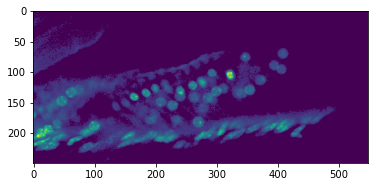

In [2]:
corti = img_as_float(imread('../samples/corti00.tif'))
im = plt.imshow(corti)

In [3]:
corti.shape

(249, 548)

For `corti00.tif` with the official plugin:

* Resolution: 5.414 pixels
* kc : 0.369
* A0 : 0.618

In [19]:
A0, resolution = measure(corti, metadata={}).values()
print(
    f"\nresolution:\t {resolution:.3f} pixels\n"
    f"A0:\t {A0:.3f}\nkc:\t {0.5/resolution:.3f}"
)


resolution:	 6.061 pixels
A0:	 0.596
kc:	 0.082


In [20]:
ci = ImageDecorr(corti, square_crop=False)
optim, res = ci.compute_resolution()

print(
    f"\nresolution:\t {ci.resolution:.3f} pixels\n"
    f"A0:\t {ci.snr0:.3f}\nkc:\t {ci.kc:.3f} "
)


resolution:	 5.553 pixels
A0:	 0.615
kc:	 0.360 


In [21]:
data = ci.all_corcoefs(
    num_rs=50, r_min=0.01, r_max=1.0, num_ws=40
)


/home/guillaume/Dev/auto_metro/auto_metro/image_decorr.py:137: RuntimeWarning: invalid value encountered in double_scalars
  return (im_fftr * f_im_fft.conjugate()).real.sum() / (c1 * c2)


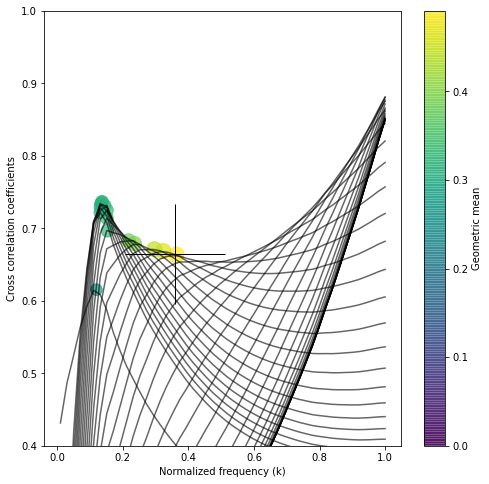

In [22]:
fig, ax = plt.subplots()

kcs = data['kc']
snrs = data["snr"]

gmean = (snrs*kcs)**0.5

sc = ax.scatter(kcs, snrs, alpha=0.7, s=gmean*500, c=gmean)

ax.plot(res["kc"], res['snr'], 'k+', ms=100)

for d in data["d"]:
    ax.plot(data['radius'], d, 'k-', alpha=0.6)

ax.set_ylim(0.4, 1.0)
fig.set_size_inches(8, 8)
cbar = fig.colorbar(sc)

ax.set_xlabel("Normalized frequency (k)")
ax.set_ylabel("Cross correlation coefficients")
_ = cbar.ax.set_ylabel("Geometric mean")